# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Загрузим данные
geo = pd.read_excel('geo.xlsx')

geo_comment = pd.read_excel('geo_comment.xlsx')


In [4]:
geo.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [5]:
geo_comment.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


# Без относительности голосов

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [29]:
X_coord = geo["x"].tolist()
Y_coord = geo["y"].tolist()

In [30]:
X = list(map(lambda x, y:[x,y], X_coord, Y_coord))

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.36791896,  0.15955291],
       [ 0.36791896,  0.15955291],
       [ 0.2931784 , -0.34813064],
       ...,
       [-1.20058354,  1.1836816 ],
       [-0.97563233,  0.38377766],
       [-0.95317246,  1.00936916]])

In [32]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

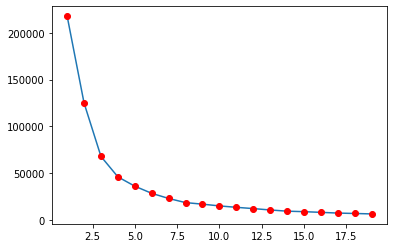

In [33]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [34]:
diff = np.diff(k_inertia)


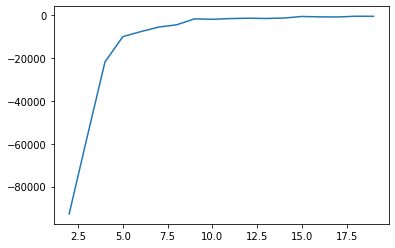

In [35]:
plt.plot(ks[1:], diff)


In [36]:
diff_r = diff[1:] / diff[:-1]


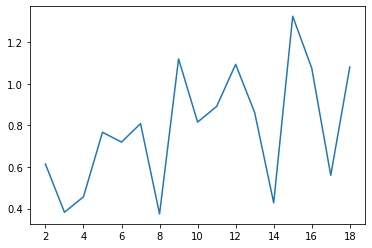

In [37]:
plt.plot(ks[1:-1], diff_r)


In [38]:

k_opt = ks[np.argmin(diff_r)+1]
k_opt

8

Самое оптимальное количество кластеров это 8

#### Разбиваем на 8 класстеров

Text(0.5, 1.0, '8 clusters')

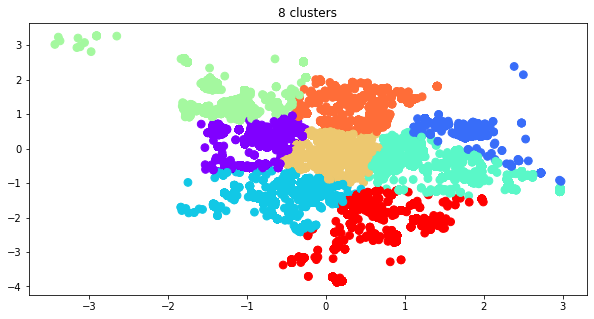

In [39]:
plt.figure(figsize=(10,5))

clf_kmeans = KMeans(n_clusters=8)
Y = clf_kmeans.fit_predict(X_scaled, )
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=Y, cmap='rainbow', s=60, alpha=1)
plt.title('8 clusters')

# За и против

In [40]:
comment_class = geo_comment["comment_class"].tolist()

comment_yes = []
comment_no = []
for index, comment in enumerate(comment_class):
    if comment == -1:
        comment_no.append(X_scaled[index])
    elif comment == 1:
        comment_yes.append(X_scaled[index])

In [41]:
X_yes = scaler.inverse_transform(comment_yes)
X_no = scaler.inverse_transform(comment_no)

Выведем сколько ЗА

Text(0.5, 1.0, '8 clusters')

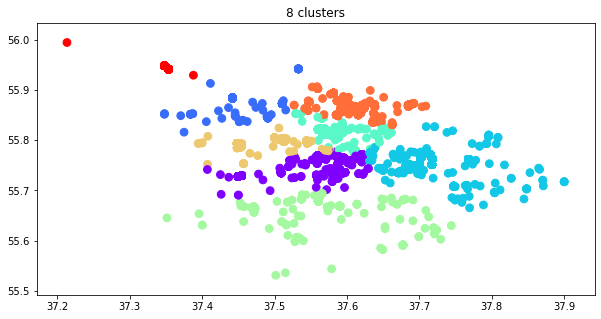

In [42]:
plt.figure(figsize=(10,5))

clf_kmeans_yes = KMeans(n_clusters=8)
Y_yes = clf_kmeans.fit_predict(comment_yes, )
plt.scatter(X_yes[:,0], X_yes[:,1], c=Y_yes, cmap='rainbow', s=60, alpha=1)
plt.title('8 clusters')

Выведем сколько ПРОТИВ

Text(0.5, 1.0, '8 clusters')

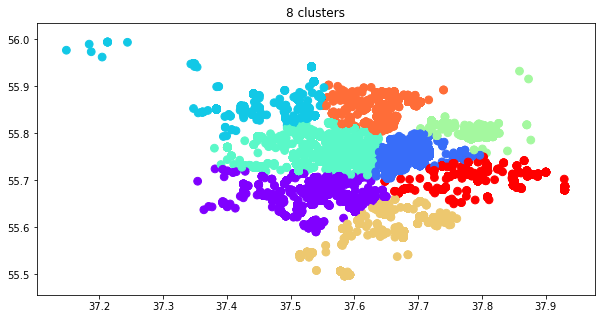

In [43]:
plt.figure(figsize=(10,5))

clf_kmeans_no = KMeans(n_clusters=8)
Y_no = clf_kmeans.fit_predict(comment_no, )
plt.scatter(X_no[:,0], X_no[:,1], c=Y_no, cmap='rainbow', s=60, alpha=1)
plt.title('8 clusters')